# **Challenge 2**

To Do:
1. Check for outliers.
2. EDA
3. Regression without PCA
4. PCA
5. Interpretation.
6. Dim reduction.
7. Regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/RitikOnTheRoad/PCA/refs/heads/main/Practice/employee_behavior_productivity.csv",index_col=0)
data.head()

,focus_duration_min,context_switches_per_hour,screen_time_hours,breaks_taken_per_day,physical_activity_minutes,sleep_quality_score,meetings_attended_per_week,slack_messages_sent,emails_sent_per_day,productivity_score
Employee_ID,,,,,,,,,,
1,137,6,5.6,4,48,9,3,134,23,89.4
2,127,9,7.9,5,40,6,6,131,30,72.3
3,139,7,8.1,4,31,4,4,96,21,52.7
4,152,8,8.5,1,42,9,3,148,12,77.6
5,126,6,8.2,1,41,8,5,146,25,74.9


In [7]:
data.describe()

,focus_duration_min,context_switches_per_hour,screen_time_hours,breaks_taken_per_day,physical_activity_minutes,sleep_quality_score,meetings_attended_per_week,slack_messages_sent,emails_sent_per_day,productivity_score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,126.080000,7.700000,7.648000,2.560000,41.000000,6.240000,5.620000,130.300000,17.340000,69.674000
std,13.964737,2.597094,0.977343,1.311799,9.655283,1.790679,2.506237,24.693426,4.834443,12.880848
min,100.000000,2.000000,5.000000,1.000000,16.000000,4.000000,1.000000,75.000000,6.000000,40.000000
25%,116.750000,6.000000,7.200000,1.250000,35.000000,5.000000,4.000000,115.250000,14.250000,60.900000
50%,126.000000,8.000000,7.750000,2.000000,41.000000,6.000000,6.000000,133.500000,17.500000,71.100000
75%,134.750000,9.000000,8.350000,3.750000,48.000000,8.000000,7.000000,145.750000,20.000000,78.850000
max,157.000000,15.000000,9.500000,5.000000,66.000000,9.000000,12.000000,184.000000,30.000000,95.000000


In [12]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

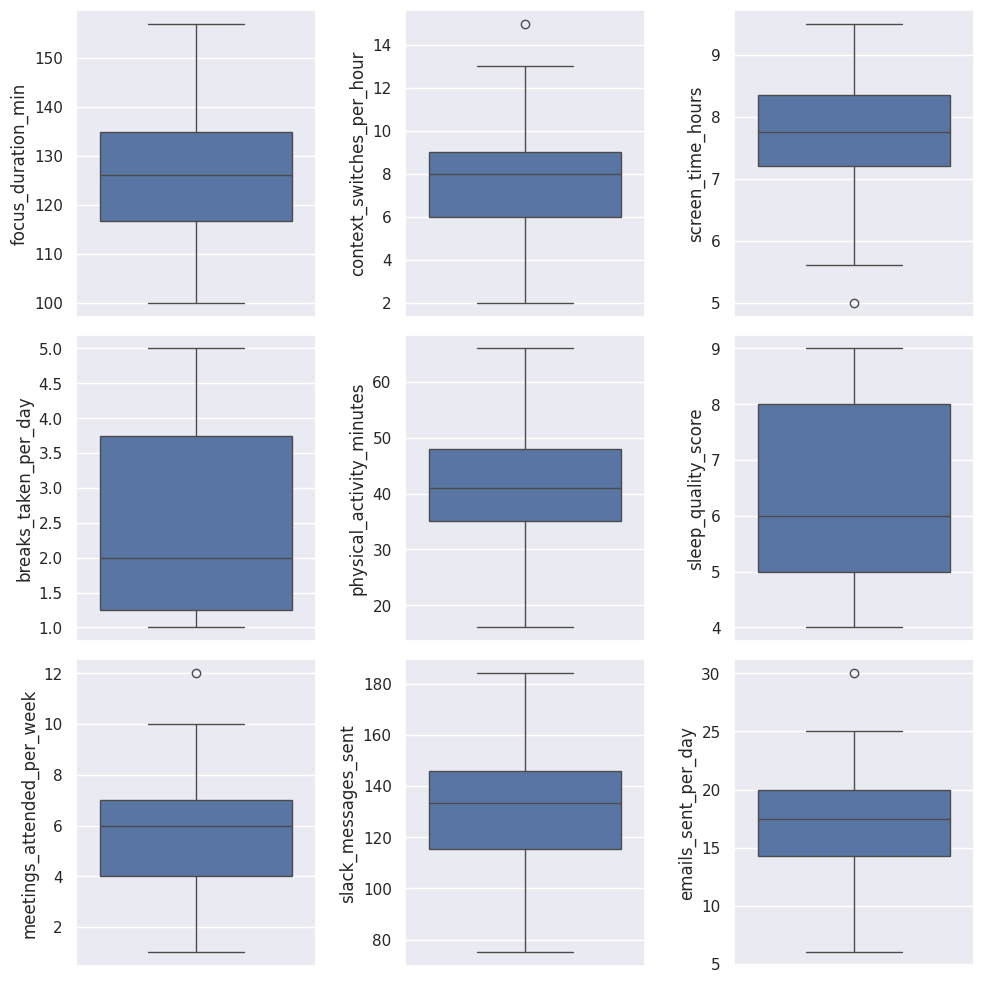

In [22]:
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=(10,10))
for i in range(0,3):
  for j in range(0,3):
    ax[i,j]=sns.boxplot(data=X.iloc[:,i*3+j],ax=ax[i,j])
plt.tight_layout()

<Axes: >

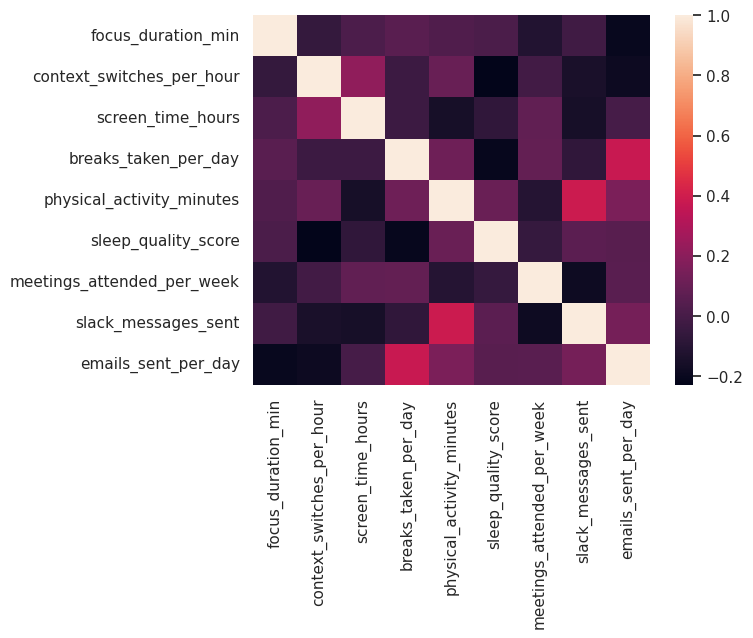

In [37]:
cov_mat=X.corr()
sns.heatmap(cov_mat)

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=data.columns.values[:-1]
vif["VIF"]=[variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [47]:
vif

,features,VIF
0,focus_duration_min,1.107050
1,context_switches_per_hour,1.243839
2,screen_time_hours,1.104066
3,breaks_taken_per_day,1.331384
4,physical_activity_minutes,1.325396
5,sleep_quality_score,1.154622
6,meetings_attended_per_week,1.068041
7,slack_messages_sent,1.308271
8,emails_sent_per_day,1.370811


In [61]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     productivity_score   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     93.29
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           5.45e-24
Time:                        06:17:42   Log-Likelihood:                -120.96
No. Observations:                  50   AIC:                             261.9
Df Residuals:                      40   BIC:                             281.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.6740      0.430    162.055      0.000      68.805      70.543
x1             1.2897      0.452      2.851      0.007       0.375       2.204
x2            -1.5442      0.480     -3.220      0.003      -2.513      -0.575
x3            -0.5142      0.452     -1.138      0.262      -1.427       0.399
x4            -0.4340      0.496     -0.875      0.387      -1.437       0.569
x5            11.2445      0.495     22.717      0.000      10.244      12.245
x6             2.9541      0.462      6.394      0.000       2.020       3.888
x7             0.6065      0.444      1.365      0.180      -0.292       1.504
x8             0.7220      0.492      1.468      0.150      -0.272       1.716
x9             0.3508      0.503      0.697      0.490      -0.667       1.368
==============================================================================
Omnibus:                        5.731   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.611
Skew:                          -0.619   Prob(JB):                       0.0997
Kurtosis:                       3.825   Cond. No.                         2.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

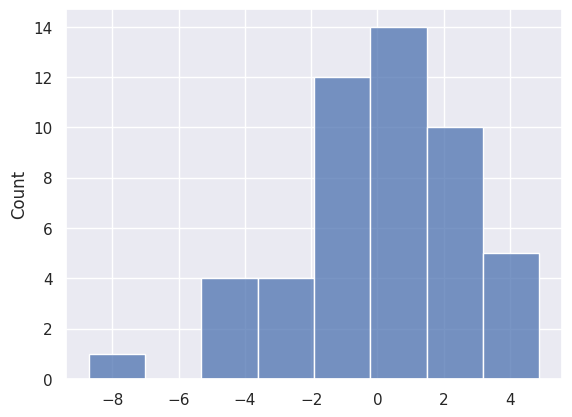

In [65]:
residuals=model.resid
sns.histplot(residuals)

**Regression after PCA**

In [91]:
from sklearn.decomposition import PCA
pca=PCA()
pca=pca.fit(X)

In [95]:
pca.explained_variance_ratio_

array([0.19240458, 0.16371627, 0.1389846 , 0.12194612, 0.103469  ,
       0.09500109, 0.08583411, 0.05064896, 0.04799528, 0.        ])

In [94]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19240458, 0.35612085, 0.49510545, 0.61705157, 0.72052056,
       0.81552165, 0.90135576, 0.95200472, 1.        , 1.        ])

In [96]:
# lets drop last 3 features

In [98]:
pca=PCA(n_components=7)
X_pca=pca.fit_transform(X)

In [99]:
sm.add_constant(X_pca)
sm.OLS(Y,X_pca).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     productivity_score   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):             -0.130
Method:                 Least Squares   F-statistic:                             0.1774
Date:                Tue, 10 Jun 2025   Prob (F-statistic):                       0.989
Time:                        06:43:40   Log-Likelihood:                         -283.25
No. Observations:                  50   AIC:                                      580.5
Df Residuals:                      43   BIC:                                      593.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.0373      8.092      0.870      0.389      -9.283      23.357
x2            -1.5858      8.773     -0.181      0.857     -19.278      16.106
x3             2.7587      9.521      0.290      0.773     -16.443      21.961
x4            -0.7386     10.165     -0.073      0.942     -21.238      19.761
x5             2.8841     11.035      0.261      0.795     -19.371      25.139
x6             6.0527     11.517      0.526      0.602     -17.173      29.278
x7            -1.6734     12.116     -0.138      0.891     -26.108      22.761
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.422
Skew:                           0.080   Prob(JB):                        0.810
Kurtosis:                       2.580   Cond. No.                         1.50
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
X_pca.shape

(50, 7)